<a href="https://colab.research.google.com/github/LongNguyen1984/DeepLearning/blob/master/PCA%2C%20LDA%2C%20TSNE%2C%20UMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Umap and Umap plot

In [1]:
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

     |████████████████████████████████| 80 kB 2.5 MB/s 
     |████████████████████████████████| 1.1 MB 10.9 MB/s 
     |████████████████████████████████| 15.8 MB 630 bytes/s 
     |████████████████████████████████| 76 kB 5.7 MB/s 
     |████████████████████████████████| 123 kB 48.5 MB/s 
     |████████████████████████████████| 786 kB 54.0 MB/s 
     |████████████████████████████████| 779 kB 48.3 MB/s 
     |████████████████████████████████| 778 kB 46.6 MB/s 
     |████████████████████████████████| 776 kB 53.6 MB/s 
     |████████████████████████████████| 769 kB 53.1 MB/s 
     |████████████████████████████████| 766 kB 32.3 MB/s 
     |████████████████████████████████| 1.0 MB 50.8 MB/s 
     |████████████████████████████████| 722 kB 37.9 MB/s 
     |████████████████████████████████| 722 kB 49.9 MB/s 
     |████████████████████████████████| 715 kB 28.2 MB/s 
     |████████████████████████████████| 705 kB 42.3 MB/s 
     |████████████████████████████████| 699 kB 40.6 MB/s 
     |█████████

# import all needed packages

In [2]:
import sklearn.datasets
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import pandas as pd
import umap
import umap.plot

#mnist = sklearn.datasets.fetch_openml("mnist_784")

##Import my Data

In [4]:
from pandas import read_csv
from pandas import DataFrame
import numpy as np

def load_data(filename):
  dataset = read_csv(filename, header=0);
  data = dataset.values;
  return data
def segment_data(signal, distance, overlap):
  i = 1;
  s = list()
  while int(i+distance)<len(signal):
    a = signal[int(i):int(i+distance)];
    #a = [x for x in t]
    #a = DataFrame.transpose(DataFrame(t))
    #a = np.split(a,int(distance-1)
    s.append(a)
    i = i + distance*overlap
    
  return np.asarray(s) # return a nd array
d = 110
data0 = load_data('drive/My Drive/Dataset/InvertPhaseLong2.csv')  
ppgl0 = segment_data(data0[70:17220,0],d,0.5)  #in-phase
ppgl1 = segment_data(data0[70:,1],d,0.5)  # in-phase 
ppgl2 = segment_data(data0[70:,2],d,0.5)  # invert-phase
ppgl3 = segment_data(data0[70:,3],d,0.5)  # in-phase

data2 = load_data('drive/My Drive/Dataset/longcunDB2.csv') 
ppg2 = segment_data(data2[70:,1],d,0.5)
ppg3 = segment_data(data2[70:,0],d,0.5) # Positive with noise

data3 = load_data('drive/My Drive/Dataset/sejanCun1.csv') 
ppgs0 = segment_data(data3[70:,0],d,0.5) # invert-phase
ppgs1 = segment_data(data3[70:,1],d,0.5) # noise
ppgs2 = segment_data(data3[1400:20200,2],d,0.5) # invert-phase
ppgs3 = segment_data(data3[70:,3],d,0.5) # noise

data4 = load_data('drive/My Drive/Dataset/longcunDB01.csv') 
ppgla0 = segment_data(data4[70:,0],d,0.5) # invert-phase
ppgla1 = segment_data(data4[70:,1],d,0.5) # noise
ppgla2 = segment_data(data4[70:,2],d,0.5) # invert-phase
ppgla3 = segment_data(data4[70:,3],d,0.5) # invert-phase

data5 = load_data('drive/My Drive/Dataset/InvertPhaseLong1.csv') 
ppglb0 = segment_data(data5[70:,0],d,0.5) # not good invert-phase
ppglb1 = segment_data(data5[70:,1],d,0.5) # in-phase
ppglb2 = segment_data(data5[70:,2],d,0.5) # invert-phase
ppglb3 = segment_data(data5[70:,3],d,0.5) # in-phase

data6 = load_data('drive/My Drive/Dataset/sejanCun2.csv') 
ppgsa0 = segment_data(data6[70:,0],d,0.5) # in-phase
ppgsa1 = segment_data(data6[70:,1],d,0.5) # noise
ppgsa2 = segment_data(data6[70:,2],d,0.5) # in-phase
ppgsa3 = segment_data(data6[70:,3],d,0.5) # noise

data7 = load_data('drive/My Drive/Dataset/sejanGuan2.csv') 
ppgsb0 = segment_data(data7[70:,0],d,0.5) # not good invert-phase
ppgsb1 = segment_data(data7[70:,1],d,0.5) # invert-phase
ppgsb2 = segment_data(data7[70:,2],d,0.5) # not good invert-phase
ppgsb3 = segment_data(data7[70:,3],d,0.5) # invert-phase

data8 = load_data('drive/My Drive/Dataset/dauChi01.csv') 
ppgd0 = segment_data(data8[70:,0],d,0.5) #  invert-phase
ppgd1 = segment_data(data8[70:,1],d,0.5) # NG invert-phase
ppgd2 = segment_data(data8[70:,2],d,0.5) #  invert-phase
ppgd3 = segment_data(data8[70:,3],d,0.5) # NG invert-phase

data9 = load_data('drive/My Drive/Dataset/dauGuan2.csv') 
ppgda0 = segment_data(data9[70:,0],d,0.5) #  in-phase
ppgda1 = segment_data(data9[70:,1],d,0.5) # noise -inphase
ppgda2 = segment_data(data9[70:,2],d,0.5) #  in-phase
ppgda3 = segment_data(data9[70:,3],d,0.5) # noise in-phase

data10 = load_data('drive/My Drive/Dataset/haiCun01.csv') 
ppgh0 = segment_data(data10[70:,0],d,0.5) #  in-phase
ppgh1 = segment_data(data10[70:,1],d,0.5) # noise -inphase
ppgh2 = segment_data(data10[70:,2],d,0.5) #  in-phase
ppgh3 = segment_data(data10[70:,3],d,0.5) # noise in-phase

data11 = load_data('drive/My Drive/Dataset/haiChi01.csv') 
ppgha0 = segment_data(data11[70:,0],d,0.5) #  noise
ppgha1 = segment_data(data11[70:,1],d,0.5) # noise 
ppgha2 = segment_data(data11[70:,2],d,0.5) #  noise 
ppgha3 = segment_data(data11[70:,3],d,0.5) # noise 

s1 = np.concatenate((ppgl0, ppgl1, ppgl3, ppglb1,ppglb3, ppgsa0, ppgsa2, ppgda0, ppgda2)) # in-phase
s2 = np.concatenate((ppgl2, ppgs0, ppgs2, ppgla0, ppgla2, ppgla3, ppglb2, ppgsb1, ppgsb3, ppgd0, ppgd2))  # invert-phase
s3 = np.concatenate((ppg2, ppgs1, ppgs3,ppgla1, ppgsa1, ppgsa3, ppgda1, ppgda3, ppgh0, ppgh1, ppgha0, ppgha1, ppgha2, ppgha3))           # noise Data

## Prepare Data

In [5]:
# label for first group of Data
y1 = [1]*s1.shape[0];
y2 = [-1]*s2.shape[0];
y3 = [0]*s3.shape[0];

y1 = np.asarray(y1)
y2 = np.asarray(y2)
y3 = np.asarray(y3)
print((y1.shape, y2.shape, y3.shape))
#ydf1 = DataFrame(y1)
#ydf2 = DataFrame(y2)
# Concatenate data
X = np.concatenate((s1, s2, s3))
y = np.concatenate((y1, y2, y3))
print(X.shape)

# rescale data
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
def scaling(signal):
  scaler = MinMaxScaler()
  s_trans = signal.transpose()
  Xscaled = scaler.fit_transform(s_trans)
  Xscaled = Xscaled.transpose()
  return Xscaled  
Xscaled = scaling(X)
Xscaled2 = scaling(ppg2)
Xscaled3 = scaling(ppg3)

((3310,), (4114,), (5230,))
(12654, 110)


# Convert to Class

In [6]:
# Convert to class 
y_df = DataFrame(y, columns=['Phase'])
y =y_df['Phase']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xscaled, y_df, test_size=0.3, random_state=123)

In [8]:
y_df.value_counts()

Phase
 0       5230
-1       4114
 1       3310
dtype: int64

## Mapping Data with UMAP

In [10]:
mapper = umap.UMAP(random_state=79, n_components= 3).fit_transform(Xscaled)

    

In [ ]:
import seaborn as sns
col_dict = {1:'#7bc90c',
            -1:'#ffb700',
            3:'#f5072f',
            4:'#d109e3',
            5: "#009dff",
            6: "#10ccb6",
            0: "#6484f5",
            8: "#ab0e3a",
            9: "#bd9e15",
            7: 'grey',
           }

class_set = y.unique()

pals = [col_dict[cl] for cl in class_set]     

 # List of RGB triplets
rgb_values = sns.color_palette(pals, 10)  

# Map label to RGB
color_map = dict(zip(class_set, rgb_values))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



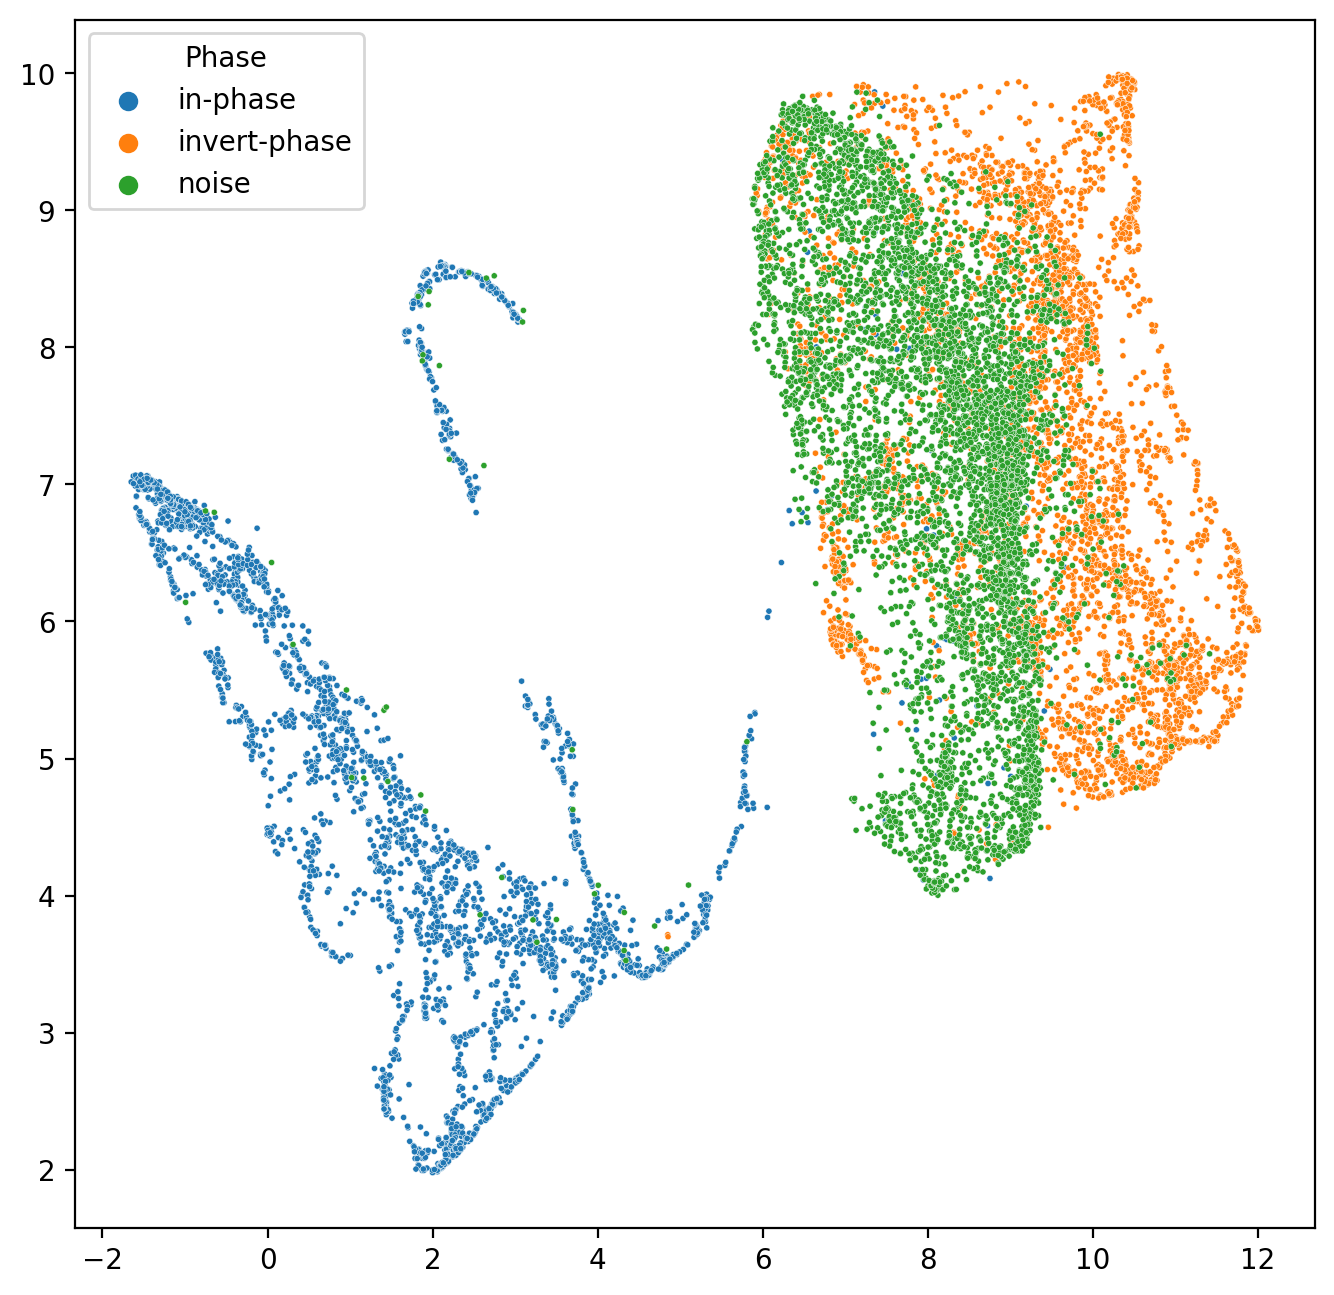

In [96]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8), dpi = 200)

sns.scatterplot(mapper[:,0],mapper[:,1], 
                hue = y.map({
        0:'noise',
        1:'in-phase',
        -1:'invert-phase',
    }), 
                s=5,
               cmap = "Blue")

In [42]:
ylabel =  y.map({
        0:'noise',
        1:'in-phase',
        -1:'invert-phase',
    })

### Using PCA, LDA, T-SNE

In [12]:
import numpy as np
import pandas as pd
import time

import plotly.io as plt_io
import plotly.graph_objects as go
%matplotlib inline

#PCA
from sklearn.decomposition import PCA
#TSNE
from sklearn.manifold import TSNE

#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

### Function Plotting

In [89]:
def plot_2d(component1, component2):
  fig = go.Figure(data=go.Scatter(
      x= component1,
      y= component2,
      #color=ylabel,
      mode ='markers',
      marker=dict(
          size=10,
          color=y, #set color equal to a varibale
          colorscale='Rainbow', # one of plotly colorscales
          showscale=True,
          line_width=1
      )
  ))
  fig.update_layout(margin=dict(l=100, r=100,b=100,t=100), width=2000, height=1200)
  fig.layout.template = 'plotly_dark'
  #fig.update_layout(labels= {0:'noise',1:'in-phase',-1:'invert-phase'})
  fig.show()

In [16]:
def plot_3d(component1,component2,component3):
  fig = go.Figure(data=[go.Scatter3d(
        x=component1,
        y=component2,
        z=component3,

        mode='markers',
        marker=dict(
            size=10,
            color=y,                # set color to an array/list of desired values
            colorscale='Rainbow',   # choose a colorscale
            opacity=1,
            line_width=1
        )
    )])
# tight layout
  fig.update_layout(margin=dict(l=50,r=50,b=50,t=50),width=1800,height=1000)
  fig.layout.template = 'plotly_dark'
    
  fig.show()

## Implement PCA

In [82]:
start = time.time()
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(Xscaled)
print('Duration:{} seconds'.format(time.time() - start))
principal = pd.DataFrame(data = principalComponents,
         columns = ['principal component1', 'principal component 2', 'principal component 3'])

Duration:0.2158966064453125 seconds


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



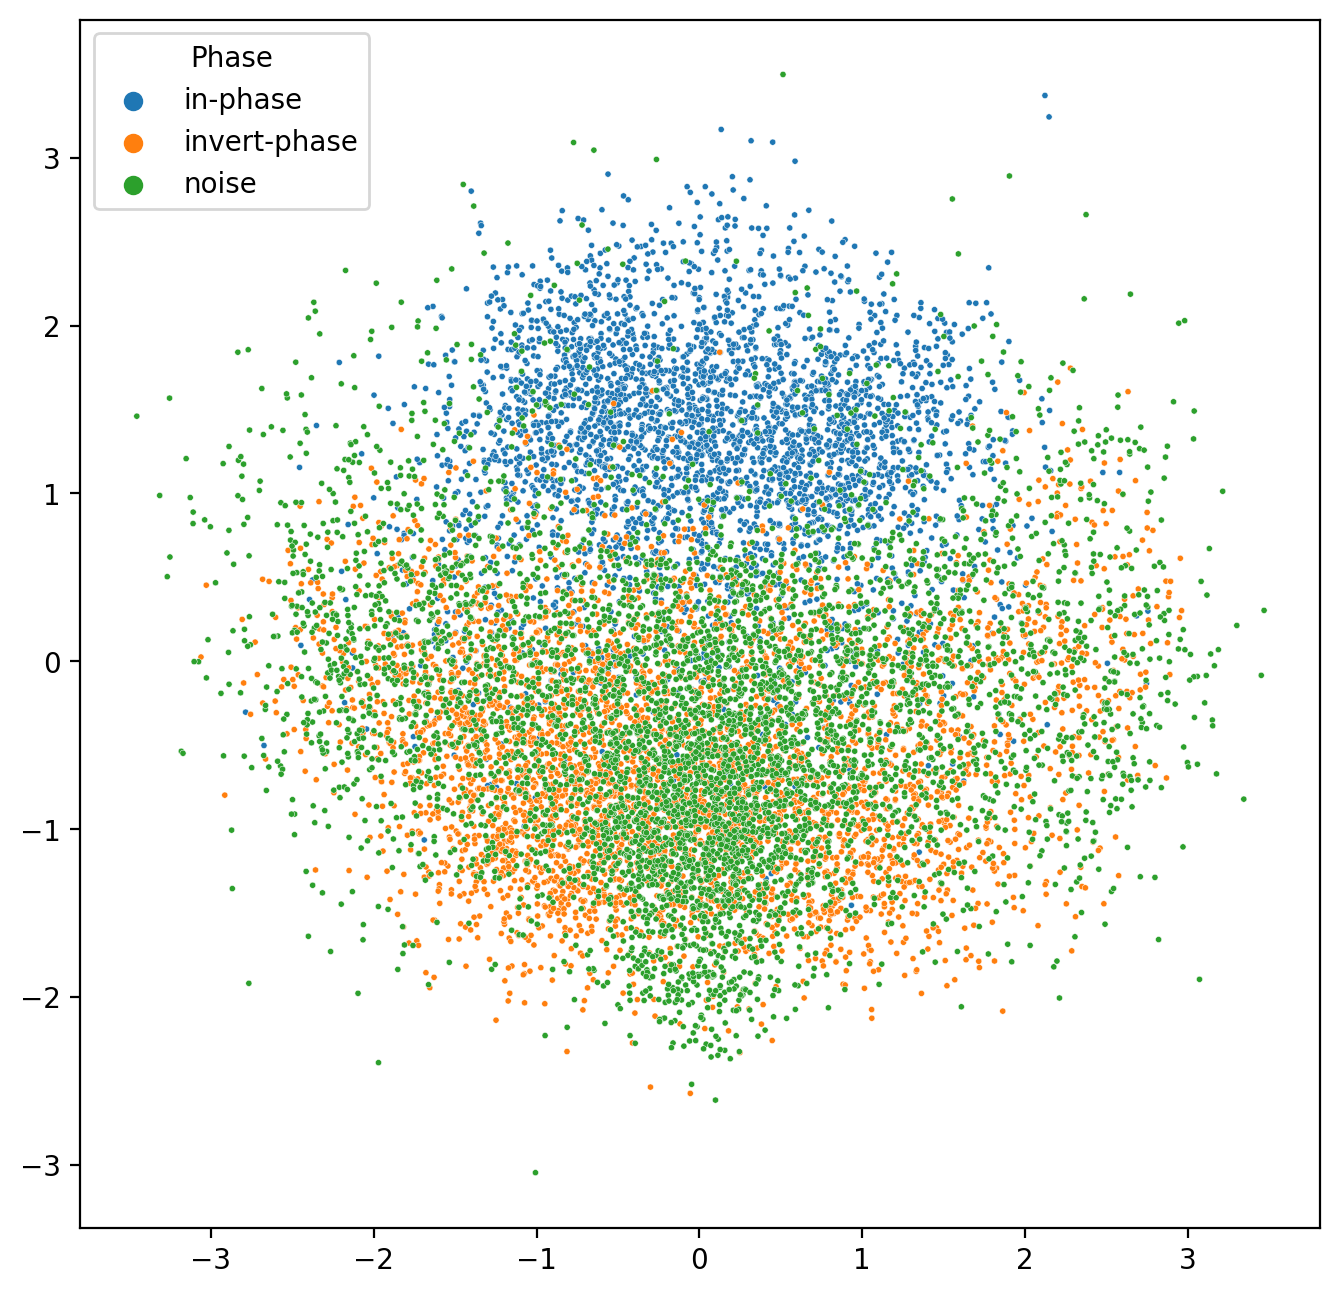

In [97]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8), dpi = 200)

sns.scatterplot(principalComponents[:,0],principalComponents[:,1], 
                hue = y.map({
        0:'noise',
        1:'in-phase',
        -1:'invert-phase',
    }), 
                s=5,
               cmap = "Blue")

In [90]:
plot_2d(principalComponents[:, 0],principalComponents[:, 1])

In [31]:
plot_3d(principalComponents[:, 0],principalComponents[:, 1],principalComponents[:, 2])

### T_SNE

In [33]:
start = time.time()
tsne = TSNE(random_state=42, n_components=3, verbose=0, perplexity=40, n_iter=400).fit_transform(Xscaled)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 411.7401235103607 seconds


In [91]:
### Reduce dimension to increse to process
start = time.time()
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(Xscaled)
tsne = TSNE(random_state = 42, n_components=3,verbose=0, perplexity=40, n_iter=400).fit_transform(pca_result_50)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 341.3281011581421 seconds


In [92]:
plot_2d(tsne[:, 0], tsne[:,1])

In [37]:
plot_3d(tsne[:,0], tsne[:,1], tsne[:,2])

### Umap 

In [93]:
start = time.time()
reducer = umap.UMAP(random_state=42, n_components=3)
embedding = reducer.fit_transform(Xscaled)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 18.90623378753662 seconds


In [94]:
plot_2d(reducer.embedding_[:, 0],reducer.embedding_[:, 1])

In [95]:
plot_3d(reducer.embedding_[:, 0],reducer.embedding_[:, 1],reducer.embedding_[:, 2])

### Implementing LDA

In [106]:
start = time.time()
X_LDA = LDA(n_components=3).fit_transform(Xscaled,y)
print('Duration: {} seconds'.format(time.time() - start))


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning:

n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(110, 3 - 1) = 2 components.

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning:

In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).



Duration: 0.3344719409942627 seconds


In [103]:
plot_2d(X_LDA[:, 0],X_LDA[:, 1])

In [104]:
plot_3d(X_LDA[:, 0],X_LDA[:, 1],X_LDA[:, 2])

IndexError: ignored

In [ ]:

p = umap.plot.interactive(mapper,labels = y,  hover_data=hover_data,point_size=2)
umap.plot.show(p)

In [ ]:
plt.figure(figsize=(8,8), dpi = 200)

plt.scatter(mapper[:,0],
            mapper[:,1], 
            c=y.map(color_map), 
            alpha = 0.9, 
            s=5)

NameError: ignored

In [ ]:
umap.plot.points(mapper, labels=y, width=1000, height=1000,  theme="red",color_key="RGB",)


ValueError: ignored

In [ ]:
y_df.value_counts()

 1    589
 0    589
-1    589
dtype: int64

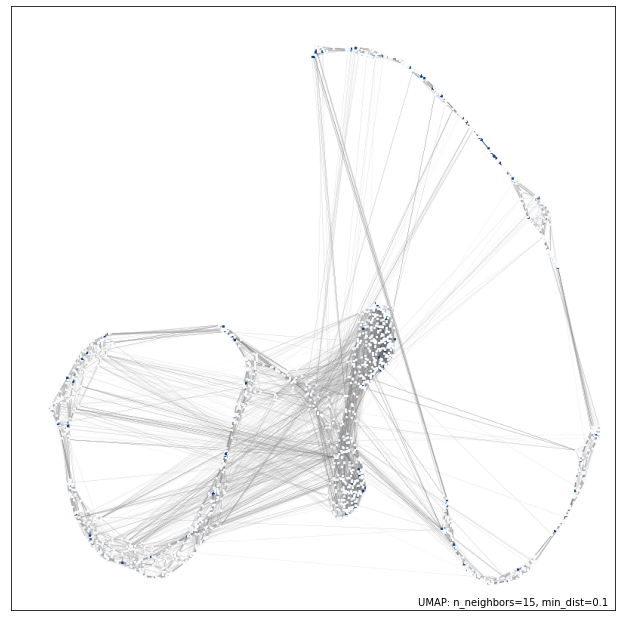

In [ ]:
umap.plot.connectivity(mapper, show_points=True)

/usr/local/lib/python3.6/dist-packages/umap/plot.py:850: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  "Hammer edge bundling is expensive for large graphs!\n"


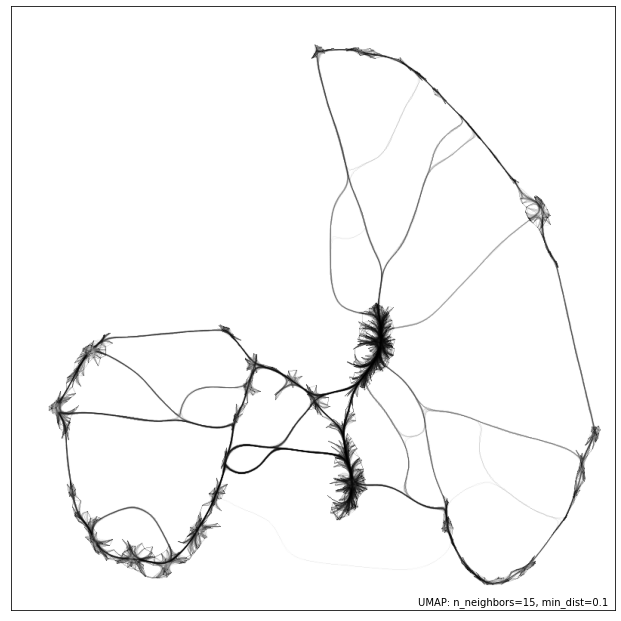

In [ ]:
umap.plot.connectivity(mapper, edge_bundling='hammer')

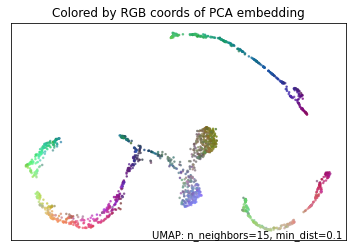

In [ ]:
umap.plot.diagnostic(mapper, diagnostic_type='pca')

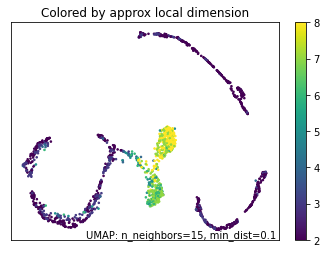

In [ ]:
local_dims = umap.plot.diagnostic(mapper, diagnostic_type='local_dim')